In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

## Data Preprocessing and Cleaning

#### Loading the Data Set

In [2]:
df = pd.read_csv("WSNBFSFdataset V2.csv")

In [3]:
df.head()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,...,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0


In [4]:
df.shape

(312106, 22)

#### Checking for missing values

In [5]:
df.isnull().sum()

Event                            0
Time                             0
S_Node                           0
Node_id                          0
Rest_Energy                      0
Trace_Level                      0
Mac_Type_Pckt                    0
Source_IP_Port                   0
Des_IP_Port                      0
Packet_Size                      0
TTL                              0
Hop_Count                        0
Broadcast_ID                     0
Dest_Node_Num                    0
Dest_Seq_Num                     0
Src_Node_ID                      0
Src_Seq_Num                      0
behaviour                        0
Type                             0
rate_of_energy_consumption       0
cumulative_energy_consumption    0
energy_consumption               0
dtype: int64

#### Dropping irrelevant and constant columns

In [6]:
columns = df.columns.tolist()

In [7]:
for column in columns:
    print(df[column].value_counts())
    print()

2    248406
4     46274
1     17426
Name: Event, dtype: int64

135.636173    14
337.617839    12
145.635174    12
265.118339    12
180.646260    12
              ..
72.547555      1
265.142340     1
105.679242     1
167.576087     1
95.609051      1
Name: Time, Length: 210302, dtype: int64

45     1988
46     1981
125    1970
127    1953
44     1938
       ... 
198     958
160     848
0       812
199     807
39      806
Name: S_Node, Length: 200, dtype: int64

45     1988
46     1981
125    1970
127    1953
44     1938
       ... 
198     958
160     848
0       812
199     807
39      806
Name: Node_id, Length: 200, dtype: int64

599.978982    26
599.979326    24
599.978466    23
599.978114    17
599.978755    16
              ..
550.836384     1
567.570887     1
553.745554     1
578.757351     1
574.641329     1
Name: Rest_Energy, Length: 232496, dtype: int64

5    312106
Name: Trace_Level, dtype: int64

800    312044
0          62
Name: Mac_Type_Pckt, dtype: int64

125.255    2065
8

In [8]:
df.drop(['Trace_Level','Mac_Type_Pckt','Des_IP_Port'], axis = 1, inplace = True)

In [9]:
df

,Event,Time,S_Node,Node_id,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,1,0.100000,79,79,600.000000,79.255,48,30,1,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
1,2,0.100963,78,78,599.979723,79.255,48,30,1,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
2,2,0.100963,76,76,599.979722,79.255,48,30,1,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
3,2,0.100964,75,75,599.979722,79.255,48,30,1,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
4,2,0.100964,118,118,599.979722,79.255,48,30,1,1,100,0,79,4,No attack,normal,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,4,656.526536,140,140,465.332078,140.255,48,30,1,31,100,16,140,68,Under attack,Blackhole,0.205346,134.644127,0.140273
312102,4,657.209643,140,140,465.191806,140.255,48,30,1,33,100,16,140,72,Under attack,Blackhole,0.205344,134.784399,0.140272
312103,4,657.891729,140,140,465.051737,140.255,48,30,1,35,100,16,140,76,Under attack,Blackhole,0.205354,134.924468,0.140069
312104,4,658.574656,140,140,464.911501,140.255,48,30,1,37,100,16,140,80,Under attack,Blackhole,0.205346,135.064704,0.140236


#### Data Transformation

##### Encoding non-numeric features

In [10]:
# One Hot Encoding for nominal featuers
encoded_data = pd.get_dummies(df, columns=['behaviour', 'Type','Event'], drop_first=True)

In [11]:
encoded_data

,Time,S_Node,Node_id,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,...,Src_Seq_Num,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption,behaviour_Under attack,Type_Flooding,Type_Forwarding,Type_normal,Event_2,Event_4
0,0.100000,79,79,600.000000,79.255,48,30,1,1,100,...,4,0.000000,0.000000,0.000000,0,0,0,1,0,0
1,0.100963,78,78,599.979723,79.255,48,30,1,1,100,...,4,0.000000,0.000000,0.000000,0,0,0,1,1,0
2,0.100963,76,76,599.979722,79.255,48,30,1,1,100,...,4,0.000000,0.000000,0.000000,0,0,0,1,1,0
3,0.100964,75,75,599.979722,79.255,48,30,1,1,100,...,4,0.000000,0.000000,0.000000,0,0,0,1,1,0
4,0.100964,118,118,599.979722,79.255,48,30,1,1,100,...,4,0.000000,0.000000,0.000000,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,656.526536,140,140,465.332078,140.255,48,30,1,31,100,...,68,0.205346,134.644127,0.140273,1,0,0,0,0,1
312102,657.209643,140,140,465.191806,140.255,48,30,1,33,100,...,72,0.205344,134.784399,0.140272,1,0,0,0,0,1
312103,657.891729,140,140,465.051737,140.255,48,30,1,35,100,...,76,0.205354,134.924468,0.140069,1,0,0,0,0,1
312104,658.574656,140,140,464.911501,140.255,48,30,1,37,100,...,80,0.205346,135.064704,0.140236,1,0,0,0,0,1


##### Data Standarization

In [12]:
time_column = encoded_data['Time'].values.reshape(-1, 1) 

scaler = StandardScaler()

time_standardized = scaler.fit_transform(time_column)

data_standardized = pd.DataFrame(encoded_data.drop(columns=['Time'])) 
data_standardized['Time_standardized'] = time_standardized

In [13]:
data_standardized

,S_Node,Node_id,Rest_Energy,Source_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,...,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption,behaviour_Under attack,Type_Flooding,Type_Forwarding,Type_normal,Event_2,Event_4,Time_standardized
0,79,79,600.000000,79.255,48,30,1,1,100,0,...,0.000000,0.000000,0.000000,0,0,0,1,0,0,-1.789469
1,78,78,599.979723,79.255,48,30,1,1,100,0,...,0.000000,0.000000,0.000000,0,0,0,1,1,0,-1.789459
2,76,76,599.979722,79.255,48,30,1,1,100,0,...,0.000000,0.000000,0.000000,0,0,0,1,1,0,-1.789459
3,75,75,599.979722,79.255,48,30,1,1,100,0,...,0.000000,0.000000,0.000000,0,0,0,1,1,0,-1.789459
4,118,118,599.979722,79.255,48,30,1,1,100,0,...,0.000000,0.000000,0.000000,0,0,0,1,1,0,-1.789459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,140,140,465.332078,140.255,48,30,1,31,100,16,...,0.205346,134.644127,0.140273,1,0,0,0,0,1,5.058103
312102,140,140,465.191806,140.255,48,30,1,33,100,16,...,0.205344,134.784399,0.140272,1,0,0,0,0,1,5.065229
312103,140,140,465.051737,140.255,48,30,1,35,100,16,...,0.205354,134.924468,0.140069,1,0,0,0,0,1,5.072344
312104,140,140,464.911501,140.255,48,30,1,37,100,16,...,0.205346,135.064704,0.140236,1,0,0,0,0,1,5.079468


##### Data Normalization

In [14]:
cols= ['S_Node', 'Node_id', 'Rest_Energy', 'Source_IP_Port', 'Packet_Size','TTL', 'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num', 'Src_Node_ID','Src_Seq_Num', 'rate_of_energy_consumption','cumulative_energy_consumption', 'energy_consumption']

selected_columns = data_standardized[cols]

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(selected_columns)

normalized_df = pd.DataFrame(normalized_data, columns=cols)

data_normalized = pd.concat([data_standardized.drop(columns=cols), normalized_df], axis=1)

In [15]:
data_normalized

,Dest_Seq_Num,behaviour_Under attack,Type_Flooding,Type_Forwarding,Type_normal,Event_2,Event_4,Time_standardized,S_Node,Node_id,...,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Src_Node_ID,Src_Seq_Num,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,0,0,0,0,1,0,0,-1.789469,0.396985,0.396985,...,0.0,1.0,0.0,0.000000,0.392638,0.420213,0.000000,0.00000,0.000000,0.000000
1,0,0,0,0,1,1,0,-1.789459,0.391960,0.391960,...,0.0,1.0,0.0,0.000000,0.392638,0.420213,0.000000,0.00000,0.000000,0.000000
2,0,0,0,0,1,1,0,-1.789459,0.381910,0.381910,...,0.0,1.0,0.0,0.000000,0.392638,0.420213,0.000000,0.00000,0.000000,0.000000
3,0,0,0,0,1,1,0,-1.789459,0.376884,0.376884,...,0.0,1.0,0.0,0.000000,0.392638,0.420213,0.000000,0.00000,0.000000,0.000000
4,0,0,0,0,1,1,0,-1.789459,0.592965,0.592965,...,0.0,1.0,0.0,0.000000,0.392638,0.420213,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312101,16,1,0,0,0,0,1,5.058103,0.703518,0.703518,...,0.0,1.0,0.0,0.434783,0.392638,0.744681,0.457143,0.00149,0.966783,0.018874
312102,16,1,0,0,0,0,1,5.065229,0.703518,0.703518,...,0.0,1.0,0.0,0.463768,0.392638,0.744681,0.485714,0.00149,0.967790,0.018874
312103,16,1,0,0,0,0,1,5.072344,0.703518,0.703518,...,0.0,1.0,0.0,0.492754,0.392638,0.744681,0.514286,0.00149,0.968796,0.018847
312104,16,1,0,0,0,0,1,5.079468,0.703518,0.703518,...,0.0,1.0,0.0,0.521739,0.392638,0.744681,0.542857,0.00149,0.969803,0.018870


In [16]:
df = data_normalized

## Feature Selection

#### SelectKBest for Linear Regression

In [17]:
X = df.drop(columns=['TTL'])  
y = df['TTL']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
r2_values = []
mse_values = []
rmse_values = []
mae_values = []
selected_features = []
for i in range(1,22):
    select_kbest = SelectKBest(score_func=f_regression, k=i)
    select_kbest.fit(X_train, y_train)
    
    X_train_new = select_kbest.transform(X_train)
    X_test_new = select_kbest.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_new, y_train)
    
    y_pred = model.predict(X_test_new)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    r2_values.append(r2)
    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    selected_features.append(X.columns[select_kbest.get_support()])
print(f"Iteration {r2_values.index(max(r2_values)) + 1} has the highest R2 of {max(r2_values)}")
print(f"Iteration {mse_values.index(min(mse_values)) + 1} has the lowest MSE of {min(mse_values)}")
print(f"Iteration {rmse_values.index(min(rmse_values)) + 1} has the lowest RMSE of {min(rmse_values)}")
print(f"Iteration {mae_values.index(min(mae_values)) + 1} has the lowest MAE of {min(mae_values)}")

Iteration 21 has the highest R2 of 0.6194401780869121
Iteration 21 has the lowest MSE of 0.013868283758048027
Iteration 21 has the lowest RMSE of 0.11776367758374408
Iteration 4 has the lowest MAE of 0.05038018070803344


#### SelectKBest for Decision Tree

In [20]:
r2_values = []
mse_values = []
rmse_values = []
mae_values = []
selected_features = []
for i in range(1,22):
    select_kbest = SelectKBest(score_func=f_regression, k=i)
    select_kbest.fit(X_train, y_train)
    
    X_train_new = select_kbest.transform(X_train)
    X_test_new = select_kbest.transform(X_test)
    
    model = DecisionTreeRegressor()
    model.fit(X_train_new, y_train)
    
    y_pred = model.predict(X_test_new)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    r2_values.append(r2)
    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    selected_features.append(X.columns[select_kbest.get_support()])
print(f"Iteration {r2_values.index(max(r2_values)) + 1} has the highest R2 of {max(r2_values)}")
print(f"Iteration {mse_values.index(min(mse_values)) + 1} has the lowest MSE of {min(mse_values)}")
print(f"Iteration {rmse_values.index(min(rmse_values)) + 1} has the lowest RMSE of {min(rmse_values)}")
print(f"Iteration {mae_values.index(min(mae_values)) + 1} has the lowest MAE of {min(mae_values)}")

Iteration 5 has the highest R2 of 1.0
Iteration 14 has the lowest MSE of 1.9421470180108689e-26
Iteration 14 has the lowest RMSE of 1.393609349140163e-13
Iteration 5 has the lowest MAE of 9.56749169083462e-14


#### SelectKBest for Random Forest

In [21]:
r2_values = []
mse_values = []
rmse_values = []
mae_values = []
selected_features = []
for i in range(1,22):
    select_kbest = SelectKBest(score_func=f_regression, k=i)
    select_kbest.fit(X_train, y_train)
    
    X_train_new = select_kbest.transform(X_train)
    X_test_new = select_kbest.transform(X_test)
    
    model = RandomForestRegressor()
    model.fit(X_train_new, y_train)
    
    y_pred = model.predict(X_test_new)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    r2_values.append(r2)
    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    selected_features.append(X.columns[select_kbest.get_support()])
print(f"Iteration {r2_values.index(max(r2_values)) + 1} has the highest R2 of {max(r2_values)}")
print(f"Iteration {mse_values.index(min(mse_values)) + 1} has the lowest MSE of {min(mse_values)}")
print(f"Iteration {rmse_values.index(min(rmse_values)) + 1} has the lowest RMSE of {min(rmse_values)}")
print(f"Iteration {mae_values.index(min(mae_values)) + 1} has the lowest MAE of {min(mae_values)}")

Iteration 8 has the highest R2 of 0.999999999853465
Iteration 8 has the lowest MSE of 5.3399976503998575e-12
Iteration 8 has the lowest RMSE of 2.3108434932725016e-06
Iteration 8 has the lowest MAE of 1.6020016737426615e-08


#### SelectFrom for Linear Regression:

In [22]:
model =  LinearRegression()
model.fit(X,y)
selector = SelectFromModel(model)
selector.fit(X,y)
selectfrom_lr_selected_features = X.columns[selector.get_support()]
print("Selected features:", selectfrom_lr_selected_features)

Selected features: Index(['Rest_Energy', 'cumulative_energy_consumption'], dtype='object')


#### SelectFrom for Decision Tree:

In [23]:
model =  DecisionTreeRegressor()
model.fit(X,y)
selector = SelectFromModel(model)
selector.fit(X,y)
selectfrom_dt_selected_features = X.columns[selector.get_support()]
print("Selected features:", selectfrom_dt_selected_features)

Selected features: Index(['Dest_Seq_Num', 'Time_standardized', 'Hop_Count', 'Broadcast_ID',
       'Src_Node_ID'],
      dtype='object')


#### SelectFrom for Random Forest:

In [24]:
model =  RandomForestRegressor()
model.fit(X,y)
selector = SelectFromModel(model)
selector.fit(X,y)
selectfrom_rf_selected_features = X.columns[selector.get_support()]
print("Selected features:", selectfrom_rf_selected_features)

Selected features: Index(['Dest_Seq_Num', 'Time_standardized', 'Hop_Count', 'Broadcast_ID',
       'Src_Node_ID', 'Src_Seq_Num'],
      dtype='object')


## Predictive Modeling

#### Linear Regression

##### SelectKBest

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
selector = SelectKBest(f_regression, k=21)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.get_support()]

In [27]:
print("The selected features for Linear Regression using SelectKBest are: ", selected_features)

The selected features for Linear Regression using SelectKBest are:  Index(['Dest_Seq_Num', 'behaviour_Under attack', 'Type_Flooding',
       'Type_Forwarding', 'Type_normal', 'Event_2', 'Event_4',
       'Time_standardized', 'S_Node', 'Node_id', 'Rest_Energy',
       'Source_IP_Port', 'Packet_Size', 'Hop_Count', 'Broadcast_ID',
       'Dest_Node_Num', 'Src_Node_ID', 'Src_Seq_Num',
       'rate_of_energy_consumption', 'cumulative_energy_consumption',
       'energy_consumption'],
      dtype='object')


In [28]:
model = LinearRegression()
lr_result = []
for i in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state = i)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    R2 = r2_score(y_test, y_pred)
    lr_result.append({'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2':R2})
lr_df = pd.DataFrame(lr_result)

In [29]:
print("The R2 of the Linear Regression using SelectKBest: ",lr_df['R2'].mean())
print("The MSE of the Linear Regression using SelectKBest: ",lr_df['MSE'].mean())
print("The RMSE of the Linear Regression using SelectKBest: ",lr_df['RMSE'].mean())
print("The MAE of the Linear Regression using SelectKBest: ",lr_df['MAE'].mean())

The R2 of the Linear Regression using SelectKBest:  0.618759695603977
The MSE of the Linear Regression using SelectKBest:  0.013792776179129449
The RMSE of the Linear Regression using SelectKBest:  0.11744048187553342
The MAE of the Linear Regression using SelectKBest:  0.05104102051725708


##### SelectFrom

In [30]:
model = LinearRegression()
selectfrom_lr_result = []
for i in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X[selectfrom_lr_selected_features], y, test_size=0.2,random_state=i)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    metrics = {'MAE': mean_absolute_error(y_test, y_pred),
               'MSE': mean_squared_error(y_test, y_pred),
               'RMSE': mean_squared_error(y_test, y_pred, squared=False),
               'R2': r2_score(y_test, y_pred)}
    selectfrom_lr_result.append(metrics)
selectfrom_lr_df = pd.DataFrame(selectfrom_lr_result)

In [31]:
print("The R2 of the Linear Regression using SelectFromModel: ",selectfrom_lr_df['R2'].mean())
print("The MSE of the Linear Regression using SelectFromModel: ",selectfrom_lr_df['MSE'].mean())
print("The RMSE of the Linear Regression using SelectFromModel: ",selectfrom_lr_df['RMSE'].mean())
print("The MAE of the Linear Regression using SelectFromModel: ",selectfrom_lr_df['MAE'].mean())

The R2 of the Linear Regression using SelectFromModel:  0.007753648549862086
The MSE of the Linear Regression using SelectFromModel:  0.03589955135221736
The RMSE of the Linear Regression using SelectFromModel:  0.18946964954211862
The MAE of the Linear Regression using SelectFromModel:  0.11917695622652798


#### Decision Tree

##### SelectKBest

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
selector = SelectKBest(f_regression, k = 12)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.get_support()]

In [34]:
print("The selected features for Decision Tree using SelectKBest are: ", selected_features)

The selected features for Decision Tree using SelectKBest are:  Index(['Dest_Seq_Num', 'behaviour_Under attack', 'Type_Flooding',
       'Type_Forwarding', 'Type_normal', 'S_Node', 'Node_id', 'Source_IP_Port',
       'Hop_Count', 'Broadcast_ID', 'Src_Node_ID', 'Src_Seq_Num'],
      dtype='object')


In [35]:
model = DecisionTreeRegressor()
skb_dt_result = []
for i in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state = i)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    R2 = r2_score(y_test, y_pred)
    skb_dt_result.append({'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2':R2})
skb_dt_df = pd.DataFrame(skb_dt_result)

In [36]:
print("The R2 of the Decision Tree Regression using SelectKBest: ", skb_dt_df['R2'].mean())
print("The MSE of the Decision Tree Regression using SelectKBest: ", skb_dt_df['MSE'].mean())
print("The RMSE of the Decision Tree Regression using SelectKBest: ", skb_dt_df['RMSE'].mean())
print("The MAE of the Decision Tree Regression using SelectKBest: ", skb_dt_df['MAE'].mean())

The R2 of the Decision Tree Regression using SelectKBest:  1.0
The MSE of the Decision Tree Regression using SelectKBest:  2.046105843889932e-26
The RMSE of the Decision Tree Regression using SelectKBest:  1.430270558371345e-13
The MAE of the Decision Tree Regression using SelectKBest:  1.0199330302131365e-13


##### SelectFrom

In [37]:
model = DecisionTreeRegressor()
selectfrom_dt_result = []
for i in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X[selectfrom_dt_selected_features], y, test_size=0.2,random_state=i)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    metrics = {'MAE': mean_absolute_error(y_test, y_pred),
               'MSE': mean_squared_error(y_test, y_pred),
               'RMSE': mean_squared_error(y_test, y_pred, squared=False),
               'R2': r2_score(y_test, y_pred)}
    selectfrom_dt_result.append(metrics)
selectfrom_dt_df = pd.DataFrame(selectfrom_dt_result)

In [38]:
print("The R2 of the Decision Tree Regression using SelectFromModel: ", selectfrom_dt_df['R2'].mean())
print("The MSE of the Decision Tree Regression using SelectFromModel: ", selectfrom_dt_df['MSE'].mean())
print("The RMSE of the Decision Tree Regression using SelectFromModel: ", selectfrom_dt_df['RMSE'].mean())
print("The MAE of the Decision Tree Regression using SelectFromModel: ", selectfrom_dt_df['MAE'].mean())

The R2 of the Decision Tree Regression using SelectFromModel:  0.9999996339618304
The MSE of the Decision Tree Regression using SelectFromModel:  1.3206445802067377e-08
The RMSE of the Decision Tree Regression using SelectFromModel:  8.344522617612732e-05
The MAE of the Decision Tree Regression using SelectFromModel:  3.961934902230468e-07


#### Random Forest

##### SelectKBest

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
selector = SelectKBest(f_regression, k = 5)
selector.fit(X_train, y_train)
selected_features = X.columns[selector.get_support()]

In [41]:
print("The selected features for Random Forest using SelectKBest are: ", selected_features)

The selected features for Random Forest using SelectKBest are:  Index(['Dest_Seq_Num', 'Type_Flooding', 'Hop_Count', 'Broadcast_ID',
       'Src_Node_ID'],
      dtype='object')


In [42]:
model = RandomForestRegressor()
skb_rf_result = []
for i in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state = i)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    R2 = r2_score(y_test, y_pred)
    skb_rf_result.append({'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2':R2})
skb_rf_df = pd.DataFrame(skb_rf_result)

In [43]:
print("The R2 of the Random Forest Regression using SelectKBest: ",skb_rf_df['R2'].mean())
print("The MSE of the Random Forest Regression using SelectKBest: ",skb_rf_df['MSE'].mean())
print("The RMSE of the Random Forest Regression using SelectKBest: ",skb_rf_df['RMSE'].mean())
print("The MAE of the Random Forest Regression using SelectKBest: ",skb_rf_df['MAE'].mean())

The R2 of the Random Forest Regression using SelectKBest:  0.9999999354286845
The MSE of the Random Forest Regression using SelectKBest:  2.3621737993532187e-09
The RMSE of the Random Forest Regression using SelectKBest:  1.2606566800485787e-05
The MAE of the Random Forest Regression using SelectKBest:  7.90664384099752e-08


##### SelectFrom

In [44]:
model = RandomForestRegressor()
selectfrom_rf_result = []
for i in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X[selectfrom_rf_selected_features], y, test_size=0.2,random_state=i)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    metrics = {'MAE': mean_absolute_error(y_test, y_pred),
               'MSE': mean_squared_error(y_test, y_pred),
               'RMSE': mean_squared_error(y_test, y_pred, squared=False),
               'R2': r2_score(y_test, y_pred)}
    selectfrom_rf_result.append(metrics)
selectfrom_rf_df = pd.DataFrame(selectfrom_rf_result)

In [45]:
print("The R2 of the Random Forest Regression using SelectFromModel: ",selectfrom_rf_df['R2'].mean())
print("The MSE of the Random Forest Regression using SelectFromModel: ",selectfrom_rf_df['MSE'].mean())
print("The RMSE of the Random Forest Regression using SelectFromModel: ",selectfrom_rf_df['RMSE'].mean())
print("The MAE of the Random Forest Regression using SelectFromModel: ",selectfrom_rf_df['MAE'].mean())

The R2 of the Random Forest Regression using SelectFromModel:  0.9999996921314452
The MSE of the Random Forest Regression using SelectFromModel:  1.1117875108135099e-08
The RMSE of the Random Forest Regression using SelectFromModel:  8.531432213742912e-05
The MAE of the Random Forest Regression using SelectFromModel:  5.388230192702664e-07


## Results Visualization

In [46]:
skb_rf_df = pd.DataFrame(skb_rf_result)
skb_dt_df = pd.DataFrame(skb_dt_result)
lr_df = pd.DataFrame(lr_result)

selectfrom_lr_df = pd.DataFrame(selectfrom_lr_result)
selectfrom_dt_df = pd.DataFrame(selectfrom_dt_result)
selectfrom_rf_df = pd.DataFrame(selectfrom_rf_result)

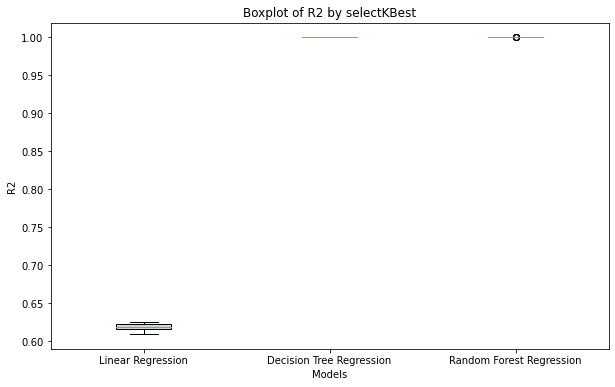

In [47]:
dataframes = [lr_df, skb_dt_df, skb_rf_df]
labels = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']

r2_values = [df['R2'] for df in dataframes]

plt.figure(figsize=(10, 6))
plt.boxplot(r2_values, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightgray'))

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Boxplot of R2 by selectKBest')

plt.show()

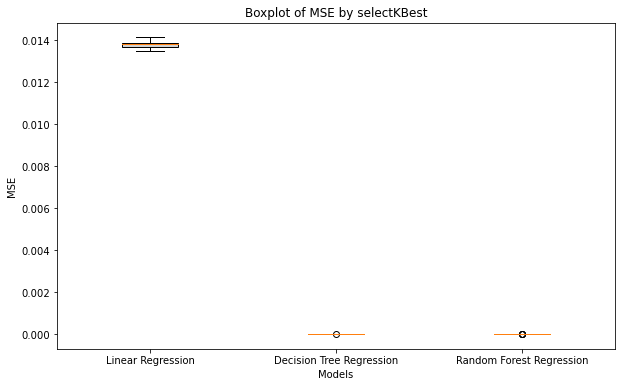

In [48]:
dataframes = [lr_df, skb_dt_df, skb_rf_df]
labels = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']

r2_values = [df['MSE'] for df in dataframes]

plt.figure(figsize=(10, 6))
plt.boxplot(r2_values, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightgray'))

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Boxplot of MSE by selectKBest')

plt.show()

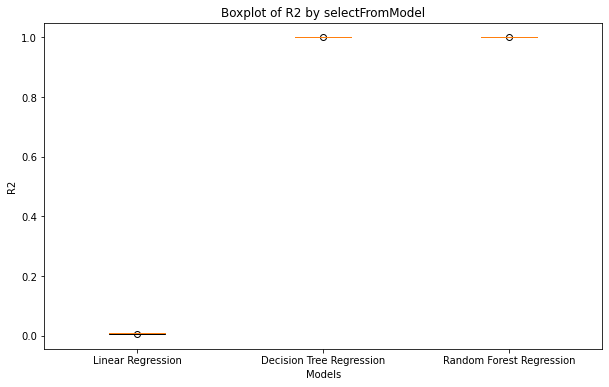

In [49]:
dataframes = [selectfrom_lr_df, selectfrom_dt_df, selectfrom_rf_df]
labels = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']

r2_values = [df['R2'] for df in dataframes]

plt.figure(figsize=(10, 6))
plt.boxplot(r2_values, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightgray'))

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('Boxplot of R2 by selectFromModel')

plt.show()

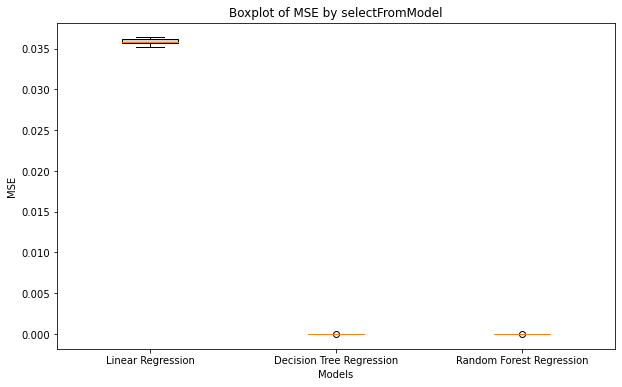

In [50]:
dataframes = [selectfrom_lr_df, selectfrom_dt_df, selectfrom_rf_df]
labels = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']

r2_values = [df['MSE'] for df in dataframes]

plt.figure(figsize=(10, 6))
plt.boxplot(r2_values, labels=labels, patch_artist=True, boxprops=dict(facecolor='lightgray'))

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Boxplot of MSE by selectFromModel')

plt.show()

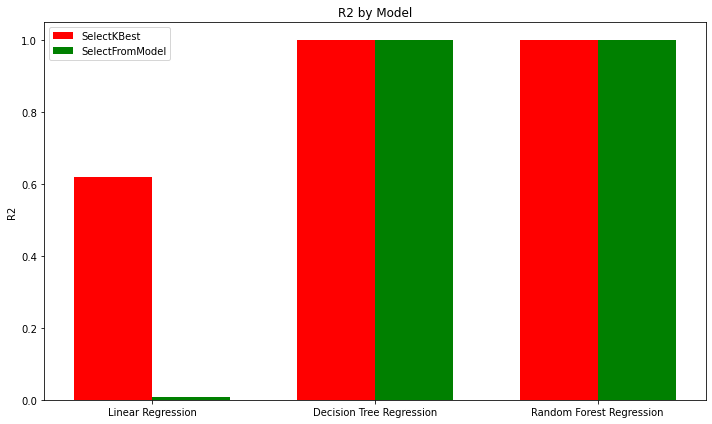

In [51]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
labels = ['R2']
colors = ['red', 'green']  # Red for SelectKBest, Green for SelectFromModel

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(models))
width = 0.35

for i, label in enumerate(labels):
    skb_value = [lr_df[label].mean(), skb_dt_df[label].mean(), skb_rf_df[label].mean()]
    sfm_value = [selectfrom_lr_df[label].mean(), selectfrom_dt_df[label].mean(), selectfrom_rf_df[label].mean()]

    ax.bar(x - width/2, skb_value, width, label='SelectKBest', color=colors[0])
    ax.bar(x + width/2, sfm_value, width, label='SelectFromModel', color=colors[1])

ax.set_ylabel('R2')
ax.set_title('R2 by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


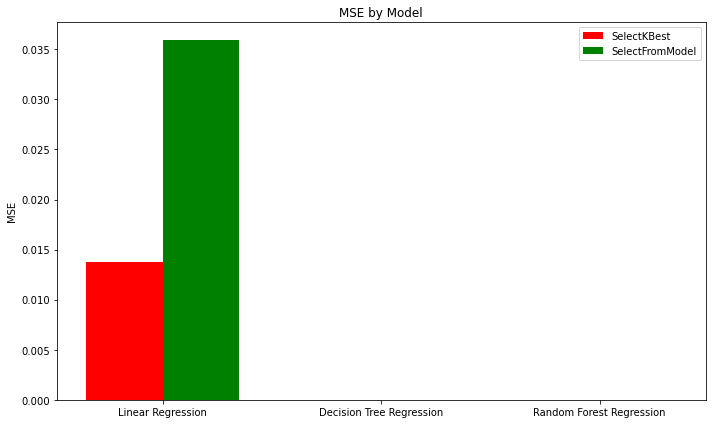

In [52]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
labels = ['MSE']
colors = ['red', 'green']  # Red for SelectKBest, Green for SelectFromModel

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(models))
width = 0.35

for i, label in enumerate(labels):
    skb_value = [lr_df[label].mean(), skb_dt_df[label].mean(), skb_rf_df[label].mean()]
    sfm_value = [selectfrom_lr_df[label].mean(), selectfrom_dt_df[label].mean(), selectfrom_rf_df[label].mean()]

    ax.bar(x - width/2, skb_value, width, label='SelectKBest', color=colors[0])
    ax.bar(x + width/2, sfm_value, width, label='SelectFromModel', color=colors[1])

ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()
